In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import random
from matplotlib import style
style.use('ggplot')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

In [3]:
class K_Means:
    fig = plt.figure()
    ax1 = fig.add_subplot(1,1,1)
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        
            
    def fit(self,data):
        #centroid dict
        self.centroids = {}
        # since k=2 we will select first two points from the data and we will declare that as a centroid
        
        self.track={}
        for i in range(self.k):
            self.track[i]=[]
        
        for i in range(self.k):
            self.centroids[i] = data[i]
            self.track[i].append(data[i])
            
        # we will run this loop for 300 times (300 iteration)
        for i in range(self.max_iter):
            self.classifications = {}  #{0: [], 1: []}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:  #finding distance from centroid , finding mini value , putting them in classification
                distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in 
                                                                                    self.centroids]
                classification = distances.index(min(distances)) #find the index of the min distance

                self.classifications[classification].append(featureset)
    

            prev_centroids = dict(self.centroids)
                            
            for classification in self.classifications:

                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
                self.track[classification].append(np.average(self.classifications[classification],axis=0))
                #print(self.centroids)
            optimized = True
            '''def animate(i):
                xar = centroids[centroid][0]
                yar = centroids[centroid][1]
                ax1.clear()
                ax1.plot(xar,yar)
             '''   
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    optimized = False
            
            #ani = animation.FuncAnimation(self.fig, animate, interval=1000)
            #plt.show()
            
            if optimized:
                break
                
            
    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        #print(distances)
        classification = distances.index(min(distances))
        return classification

In [4]:
df = pd.read_csv('data.csv')
original_df = pd.DataFrame.copy(df)
df.replace('?',0, inplace=True)
df.drop(['id'], 1, inplace=True)
df.drop(['label'], 1, inplace=True)
full_data = df.astype(float).values.tolist()

In [5]:
train = full_data[:int(0.8*len(full_data))]
test = full_data[int(0.8*len(full_data)):]

In [6]:
labels = original_df['label'].tolist()[int(0.8*len(full_data)):]
test_output = []
for i in labels:
    if i == 2:
        test_output.append(0)
    else:
        test_output.append(1)

In [7]:
acc=[]
for k in range(1,6):
    clf = K_Means(k=k)
    clf.fit(np.array(train))
    correct = 0
    total = 0
    for i in range(len(test)):
        if(clf.predict(test[i]) == test_output[i]):
            correct+=1
        total += 1
    print("Accuracy for k=",k,": ",correct/total)
    acc.append(correct/total)

Accuracy for k= 1 :  0.75
Accuracy for k= 2 :  1.0
Accuracy for k= 3 :  0.18571428571428572
Accuracy for k= 4 :  0.36428571428571427
Accuracy for k= 5 :  0.37142857142857144


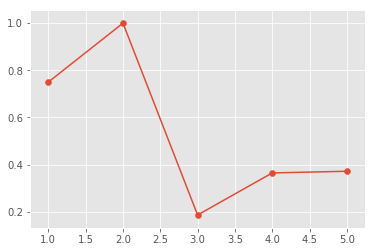

In [8]:
plt.plot([1,2,3,4,5],acc)
plt.scatter([1,2,3,4,5],acc)
plt.show()